<a href="https://colab.research.google.com/github/PouyaSonej/Geospatial-vehicles-detection/blob/main/RetinaNet_NWPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import csv
import cv2

In [ ]:
!unrar x -inul "/content/drive/MyDrive/NWPU VHR-10 dataset.rar"

In [ ]:
!git clone https://github.com/fizyr/keras-retinanet

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6220, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 6220 (delta 5), reused 6 (delta 2), pack-reused 6205
Receiving objects: 100% (6220/6220), 13.48 MiB | 11.32 MiB/s, done.
Resolving deltas: 100% (4206/4206), done.


In [ ]:
cd keras-retinanet/

/content/keras-retinanet


In [ ]:
!pip install . --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp38-cp38-linux_x86_64.whl size=172722 sha256=ed39097ad6a050a1569b3e1a91340f584a96d20cad45f6f688339bc9e1fef64b
  Stored in directory: /root/.cache/pip/wheels/68/58/4e/8be58184393d8172c0cfc492d89ccfd890df58660b6308249f
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=8c48a65b933ced1abbdb9e84c6b3f6339f01f22127c36b5d49ec38e23d0385ed
  Stored in direc

In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.8/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/keras_retinanet
creating build/temp.linux-x86_64-3.8/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.8 -I/usr/local/lib/python3.8/dist-packages/numpy/core/include

In [ ]:
import numpy as np
import os
import pdb

nwpu_classes = {
    0: 'airplane',
    1: 'ship',
    2: 'storage tank',
    3: 'baseball diamond',
    4: 'tennis court',
    5: 'basketball court',
    6: 'ground track field',
    7: 'harbor',
    8: 'bridge',
    9: 'vehicle'
}

img_path = '/content/NWPU VHR-10 dataset/positive image set/'
gt_path = '/content/NWPU VHR-10 dataset/ground truth/'

train_csv = open('train.csv', 'w')
valid_csv = open('valid.csv', 'w')
for name in os.listdir(img_path):
    img_name = img_path + name
    is_train = np.random.rand() < 0.7
    with open(gt_path + name[:-3] + 'txt', 'r') as gt_file:
        while True:
            line = gt_file.readline()
            if len(line) < 2:
              break
            obj = line.replace('(', '').replace(')', '').replace(' ', '')
            loc = obj.rfind(',')
            cls = nwpu_classes[int(obj[loc+1:])-1]
            string = img_name + ',' + obj[:loc] + ',' + cls + '\n'
            if is_train:
                train_csv.write(string)
            else:
                valid_csv.write(string)

train_csv.close()
valid_csv.close()

map_file = open('class_mapping.txt', 'w')
for i in range(len(nwpu_classes)):
    map_file.write(nwpu_classes[i] + ',' + str(i) + '\n')
map_file.close()

In [ ]:
!python keras_retinanet/bin/train.py --backbone resnet50 --epochs 20 --steps 445 --compute-val-loss --random-transform csv /content/keras-retinanet/train.csv /content/keras-retinanet/class_mapping.txt --val-annotations /content/keras-retinanet/valid.csv

102945312/102945312 [==============================] - 19s 0us/step
Creating model, this may take a second...
2022-11-04 05:07:38.495093: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                         

In [ ]:
# Running directly from the repository:
!python keras_retinanet/bin/convert_model.py /content/keras-retinanet/snapshots/resnet50_csv_20.h5 /content/keras-retinanet/snapshots/resnet50_csv_20.h5

In [ ]:
cp /content/keras-retinanet/snapshots/resnet50_csv_20.h5 /content/drive/MyDrive/Datasets/NWPU/

# Test

In [ ]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

In [ ]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = '/content/drive/MyDrive/Datasets/NWPU/resnet50_csv_20.h5'

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = nwpu_classes

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://twistedsifter.com/wp-content/uploads/2015/02/singapore-ships.jpg', 'image1.jpg')
urllib.request.urlretrieve('https://media.wired.com/photos/5aea3b5f49e4954623723011/master/w_2560%2Cc_limit/AirbusDrone.jpg', 'image2.jpg')

processing time:  6.12284779548645


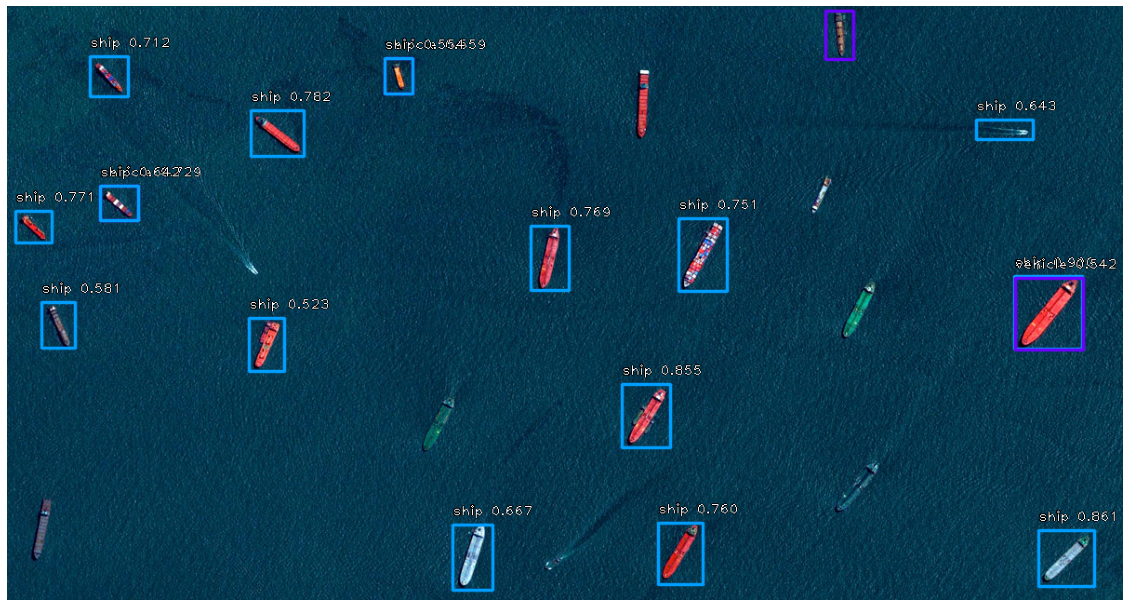

processing time:  3.993147134780884


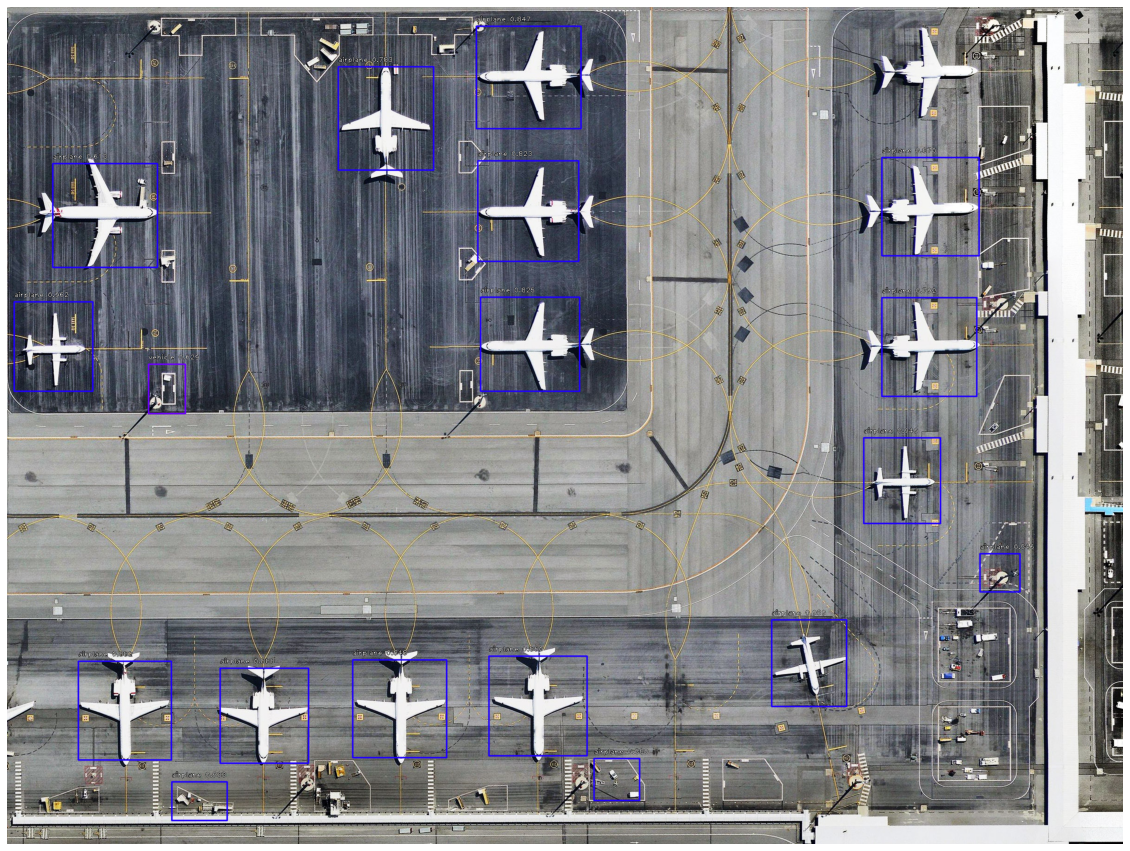

In [ ]:
# load image
for name in ['image1.jpg', 'image2.jpg']:
  image = read_image_bgr(name)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image, max_side=2500, min_side=1000)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < 0.5:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)

  cv2.imwrite('result_' + name, cv2.cvtColor(draw, cv2.COLOR_BGR2RGB))
  plt.figure(figsize=(20, 20))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()